In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
var('a b c d')
G = Graph([(0, 2), (0, 2), (0, 3), (1, 1), (1, 2), (1, 2), (1, 2), (1, 3), (2, 2), (2, 3)],
          loops=True,multiedges=True)
G1 =  Graph([(0, 2), (0, 2), (0, 3), (1, 2), (1, 2), (1, 2), (1, 3), (2, 3)],
          multiedges=True)
G.relabel([a,b,c,d])
G1.relabel([a,b,c,d])
Gpos ={a: [1.0, 0.66], b: [2, -0.33], c: [1, -0.33], d: [2, 0.66]}
slikaG = G.plot(pos=Gpos,vertex_size=400,graph_border=True,figsize=[3,3])
slikaG1 = G1.plot(pos=Gpos,vertex_size=200,graph_border=True,figsize=[2,2])

### 1. zadatak
Zadan je graf $G$ na donjoj slici.
1. Napišite matricu susjedstva grafa $G$.
2. Odredite stupnjeve svih vrhova u grafu $G$, ukupni broj petlji i ukupni broj višestrukih bridova koji nisu petlje. 
3. Pomoću matričnog teorema o stablima odredite ukupni broj razapinjućih stabala grafa $G$.
4. Koliko ima ukupno neizomorfnih razapinjućih stabala od grafa $G$.

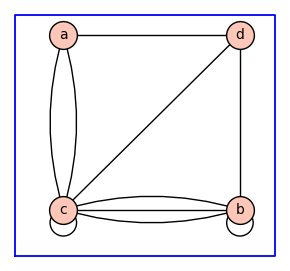

In [3]:
slikaG

#### Rješenje (matrica susjedstva)

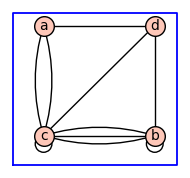

In [4]:
G.plot(pos=Gpos,vertex_size=200,graph_border=True,figsize=[2,2])

In [5]:
G.vertices()

[a, b, c, d]

In [6]:
A = G.adjacency_matrix(); A

[0 0 2 1]
[0 1 3 1]
[2 3 1 1]
[1 1 1 0]

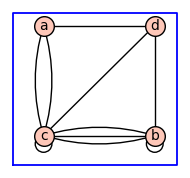

In [7]:
G.plot(pos=Gpos,vertex_size=200,graph_border=True,figsize=[2,2])

In [8]:
G.degree(labels=True)

{a: 3, b: 6, c: 8, d: 3}

In [9]:
G.number_of_loops() 

2

Broj višestrukih bridova: 5

#### Rješenje (Matrični teorem o stablima)

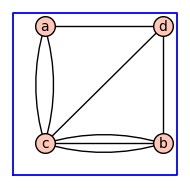

In [10]:
slikaG1

In [11]:
A1 = G1.adjacency_matrix(); A1

[0 0 2 1]
[0 0 3 1]
[2 3 0 1]
[1 1 1 0]

#### Rješenje (Matrični teorem o stablima)

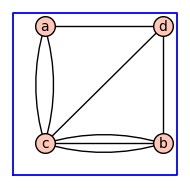

In [12]:
slikaG1

In [13]:
A1 = G1.adjacency_matrix()
Q = G1.kirchhoff_matrix()
A1, Q

(
[0 0 2 1]  [ 3  0 -2 -1]
[0 0 3 1]  [ 0  4 -3 -1]
[2 3 0 1]  [-2 -3  6 -1]
[1 1 1 0], [-1 -1 -1  3]
)

In [14]:
A1 = G1.adjacency_matrix()
Q = G1.kirchhoff_matrix()
A1, Q

(
[0 0 2 1]  [ 3  0 -2 -1]
[0 0 3 1]  [ 0  4 -3 -1]
[2 3 0 1]  [-2 -3  6 -1]
[1 1 1 0], [-1 -1 -1  3]
)

In [15]:
Q.adjugate()

[29 29 29 29]
[29 29 29 29]
[29 29 29 29]
[29 29 29 29]

In [16]:
G.spanning_trees_count()

29

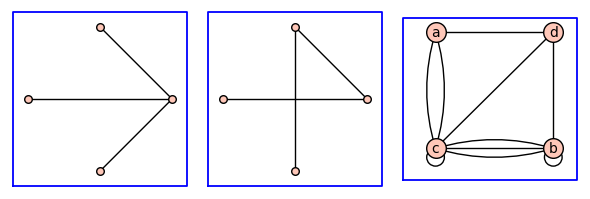

In [17]:
gr = list(filter(lambda G: G.is_tree(), graphs(4)))
lista4 = [g.plot(vertex_size=30,vertex_labels=False,layout="circular",graph_border=True) for g in gr] + \
[G.plot(pos=Gpos,vertex_size=200,graph_border=True,figsize=[2,2])]
graphics_array(lista4,1,3).show(figsize=[6,3.5])

Graf $G$ od ukupno $29$ razapinjućih stabala, do na izomorfizam ima samo dvije klase neizomorfnih razapinjućih stabala.

Sva razapinjuća stabla grafa $G$

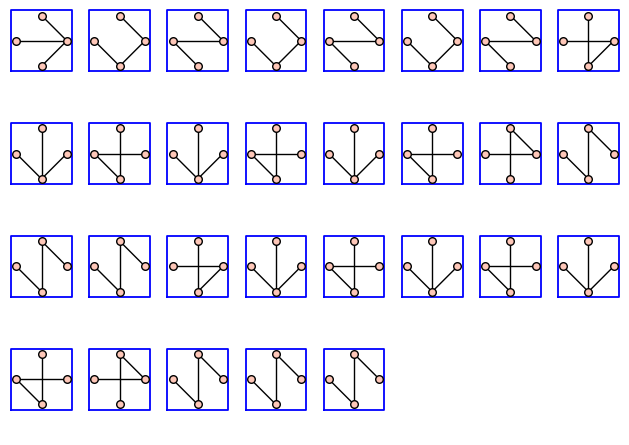

In [18]:
lista=[g.plot(vertex_size=30, vertex_labels=False,
              layout="circular",graph_border=True)
       for g in G.spanning_trees()]
graphics_array(lista,4,8)

In [19]:
#var('a b c d e f g h k')
#G=graphs.RandomGNM(9,13)
#G.relabel([a,b,c,d,e,f,g,h,k])
#G.edges(labels=False)
#G.plot(graph_border=True,save_pos=True)
#G.get_pos()
G = Graph([('c', 'a'), ('d', 'a'), ('f', 'a'), ('h', 'a'), ('k', 'a'), ('c', 'b'), ('d', 'b'), 
           ('e', 'b'), ('k', 'c'), ('h', 'd'), ('g', 'f'), ('h', 'f'), ('k', 'g')])
Gpos = {'a': [1.4, -0.1],
        'b': [1.6, 0.18],
        'c': [1.2, 0.18],
        'd': [1.8, -0.1],
        'e': [2, 0.18],
        'f': [1.4, -0.5],
        'g': [1.0, -0.5],
        'h': [1.8, -0.5],
        'k': [1.0, -0.1]}
slikaG = G.plot(pos=Gpos,vertex_size=300,graph_border=True,figsize=[3.3,2.3])

In [20]:
def BFS(G,v0,reverse=False):
    V=G.vertices()
    V.remove(v0)
    color={}
    P={}
    d={}
    for u in V:
        color[u]="WHITE"
        d[u]=Infinity
        P[u]=None
    color[v0]="GRAY"
    d[v0]=0
    P[v0]=None
    Q=[]
    Q.append(v0)
    redoslijed_vrhova=[v0]
    while Q!=[]:
        u=Q.pop(0)
        for v in sorted(G[u], reverse = reverse):
            if color[v]=="WHITE":
                color[v]="GRAY"
                d[v]=d[u]+1
                P[v]=u
                Q.append(v)
                redoslijed_vrhova.append(v)
        color[u]="BLACK"
    bridovi=[]
    for u in redoslijed_vrhova:
        if P[u]!=None:
            if (u,P[u]) in G.edges(labels=False):
                bridovi.append((u,P[u]))
            else:
                bridovi.append((P[u],u))
    return (redoslijed_vrhova,bridovi,d)

In [21]:
def DFS(G,v0,reverse=False):
    global time
    V=G.vertices()
    V.remove(v0)
    vrhovi=[v0]+V
    color={}
    d={}
    f={}
    P={}
    time=0    
    def DFS_posjet(u):
        global time
        color[u]="GRAY"
        time=time+1
        d[u]=time
        for v in sorted(G[u], reverse = reverse):
            if color[v]=="WHITE":
                P[v]=u
                DFS_posjet(v)
        color[u]="BLACK"
        time=time+1
        f[u]=time
    for u in vrhovi:
        color[u]="WHITE"
        P[u]=None
    for u in vrhovi:
        if color[u]=="WHITE":
            DFS_posjet(u)
    redoslijed_vrhova=sorted(G.vertices(),key=lambda x: d[x])
    bridovi=[]
    for u in redoslijed_vrhova:
        if P[u]!=None:
            if (u,P[u]) in G.edges(labels=False):
                bridovi.append((u,P[u]))
            else:
                bridovi.append((P[u],u))
    return (redoslijed_vrhova,bridovi,d,f)

In [22]:
def BFS_graf(G,v0,raspored_vrhova=None,lay="circular",bojaBridova="red",boja_v0="yellow"):
    podaci=BFS(G,v0)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={bojaBridova:podaci[1]},vertex_colors={boja_v0:[podaci[0][0]]},layout=laj)
    else:
        slika=G.plot(edge_colors={bojaBridova:podaci[1]},vertex_colors={boja_v0:[podaci[0][0]]},pos=raspored_vrhova)
    return slika

In [23]:
def DFS_graf(G,v0,raspored_vrhova=None,lay="circular",bojaBridova="red",boja_v0="yellow"):
    podaci=DFS(G,v0)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={bojaBridova:podaci[1]},vertex_colors={boja_v0:[podaci[0][0]]},layout=laj)
    else:
        slika=G.plot(edge_colors={bojaBridova:podaci[1]},vertex_colors={boja_v0:[podaci[0][0]]},pos=raspored_vrhova)
    return slika

In [24]:
T = Graph(BFS(G,'c')[1])
#T.plot(layout='tree',tree_root='c',save_pos=True)
posT = {'g': [3.0, -1],
        'k': [3.0, -0.5],
        'e': [1.33, -1],
        'b': [1.33, -0.5],
        'f': [0, -1],
        'd': [-0.5, -1],
        'h': [0.5, -1],
        'a': [0.0, -0.5],
        'c': [1.33, 0]}
slikaT = T.plot(pos=posT,figsize=[3.3,2.3])
from tabulate import tabulate
rezBFS = BFS(G,'c')
pr = dict(rezBFS[1])
pr['c'] = '-'
tablicaBFS = [['v'],['pi(v)'],['d(v)']]
for v in G.vertex_iterator():
    tablicaBFS[0].append(v)
    tablicaBFS[1].append(pr[v])
    tablicaBFS[2].append(rezBFS[2][v])

In [25]:
Td = Graph(DFS(G,'c')[1])
#Td.plot(layout='tree',tree_root='c',save_pos=True)
posTd = {'k': [1.0, -6],
         'g': [1.0, -5],
         'e': [0.0, -4],
         'b': [0.0, -3],
         'f': [1.0, -4],
         'h': [1.0, -3],
         'd': [0.5, -2],
         'a': [0.5, -1],
         'c': [0.5, 0]}
slikaTd = Td.plot(pos=posTd,figsize=[3.3,3.3])
rezDFS = DFS(G,'c')
pr2 = dict(rezDFS[1])
pr2['c'] = '-'
tablicaDFS = [['v'],['pi(v)'],['d(v)'],['f(v)']]
for v in G.vertex_iterator():
    tablicaDFS[0].append(v)
    tablicaDFS[1].append(pr[v])
    tablicaDFS[2].append(rezDFS[2][v])
    tablicaDFS[3].append(rezDFS[3][v])

### 2. zadatak
Zadan je graf $G$ na donjoj slici.
1. Pomoću BFS algoritma odredite jedno razapinjuće stablo grafa $G$ tako da krenete od vrha $c$, a susjedne vrhove posjećujete po abecedi prema njihovim imenima. Nacrtajte pripadno korijensko BFS stablo. Odredite prethodnike svakog vrha i udaljenosti svih vrhova od vrha $c$ u zadanom grafu $G$.
2. Pomoću DFS algoritma odredite jedno razapinjuće stablo grafa $G$ tako da krenete od vrha $c$, a susjedne vrhove posjećujete po abecedi prema njihovim imenima. Nacrtajte pripadno korijensko DFS stablo. Za svaki vrh odredite njegov prethodnik, trenutak kad je vrh prvi put posjećen i trenutak kada je DFS algoritam završio sa istraživanjem pojedinog vrha.


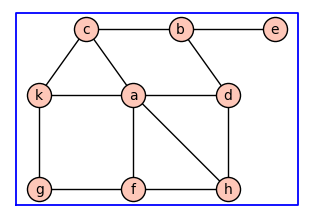

In [26]:
slikaG

BFS algoritam

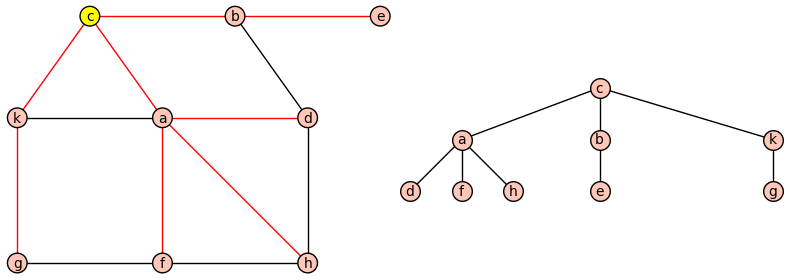

In [27]:
graphics_array([BFS_graf(G,'c',raspored_vrhova=Gpos), slikaT],1,2).show(figsize=[8,5])

In [28]:
tabulate(tablicaBFS, tablefmt='html')

'<table>\n<tbody>\n<tr><td>v    </td><td>c</td><td>a</td><td>d</td><td>f</td><td>h</td><td>k</td><td>b</td><td>e</td><td>g</td></tr>\n<tr><td>pi(v)</td><td>-</td><td>c</td><td>a</td><td>a</td><td>a</td><td>c</td><td>c</td><td>b</td><td>k</td></tr>\n<tr><td>d(v) </td><td>0</td><td>1</td><td>2</td><td>2</td><td>2</td><td>1</td><td>1</td><td>2</td><td>2</td></tr>\n</tbody>\n</table>'

**poredak vrhova:** c, a, b, k, d, f, h, e, g

DFS algoritam

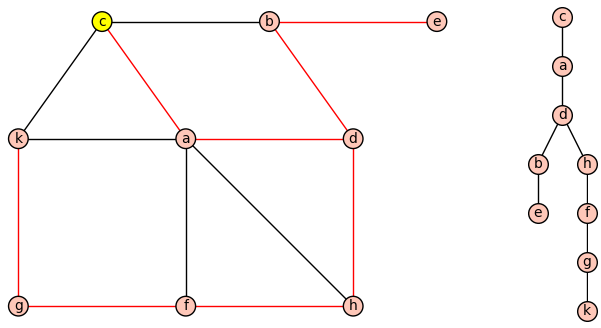

In [29]:
graphics_array([DFS_graf(G,'c',raspored_vrhova=Gpos), slikaTd],1,2).show(figsize=[8,3.4])

In [30]:
tabulate(tablicaDFS, tablefmt='html')

'<table>\n<tbody>\n<tr><td>v    </td><td>c </td><td>a </td><td>d </td><td>f </td><td>h </td><td>k </td><td>b</td><td>e</td><td>g </td></tr>\n<tr><td>pi(v)</td><td>- </td><td>c </td><td>a </td><td>a </td><td>a </td><td>c </td><td>c</td><td>b</td><td>k </td></tr>\n<tr><td>d(v) </td><td>1 </td><td>2 </td><td>3 </td><td>9 </td><td>8 </td><td>11</td><td>4</td><td>5</td><td>10</td></tr>\n<tr><td>f(v) </td><td>18</td><td>17</td><td>16</td><td>14</td><td>15</td><td>12</td><td>7</td><td>6</td><td>13</td></tr>\n</tbody>\n</table>'

**poredak vrhova:** c, a, d, b, e, h, f, g, k

In [31]:
var('a b c d e f g h k')
#G=graphs.RandomGNM(9,13)
#G.relabel([a,b,c,d,e,f,g,h,k])
#G.edges(labels=False)
#G.plot(graph_border=True,save_pos=True)
#G.get_pos()
Gt = Graph({a:{c:5,d:3,f:8,h:4,k:3},
            b:{c:7,d:5,e:2},
            c:{k:7},d:{h:4},
            f:{g:6,h:7},g:{k:3}},
           weighted=True)
Gtpos = {a: [1.4, -0.1],
         b: [1.6, 0.18],
         c: [1.2, 0.18],
         d: [1.8, -0.1],
         e: [2, 0.18],
         f: [1.4, -0.5],
         g: [1.0, -0.5],
         h: [1.8, -0.5],
         k: [1.0, -0.1]}
slikaGt = Gt.plot(pos=Gtpos,vertex_size=300,edge_labels=True,graph_border=True,figsize=[4.5,3.5])

In [32]:
def rucni_Kruskal(G,opcija='min'):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Kruskal")
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Kruskal")
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Kruskalov algoritam"
    bridovi_stablo=list(map(lambda e: e[0:2],bridovi))
    bridovi_tezine=list(map(lambda e: e[2], bridovi))
    return tabulate([['korak']+list(range(1,len(G))),['brid']+bridovi_stablo,['tezina']+bridovi_tezine],
                    tablefmt='html')

In [33]:
def Kruskal_stablo(G,opcija='min',raspored_vrhova=None,lay="circular"):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Kruskal")
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Kruskal")
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Kruskalov algoritam"
    bridovi=map(lambda e: e[0:2], bridovi)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi},pos=raspored_vrhova,edge_labels=True)
    return slika

In [34]:
def rucni_Prim(G,v0,opcija='min'):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Prim_edge",starting_vertex=v0)
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Prim_edge",starting_vertex=v0)
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Primov algoritam"
    bridovi_stablo=list(map(lambda e: e[0:2],bridovi))
    bridovi_tezine=list(map(lambda e: e[2], bridovi))
    return tabulate([[str(v0)+' / '+'korak']+list(range(1,len(G))),
                     ['brid']+bridovi_stablo,['tezina']+bridovi_tezine],tablefmt='html')

In [35]:
def Prim_stablo(G,v0,opcija='min',raspored_vrhova=None,lay="circular"):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Prim_edge",starting_vertex=v0)
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Prim_edge",starting_vertex=v0)
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Primov algoritam"
    bridovi=map(lambda e: e[0:2], bridovi)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi},pos=raspored_vrhova,edge_labels=True)
    return slika

### 3. zadatak
Zadan je težinski graf $G$ na donjoj slici.
1. Pomoću Kruskalovog algoritma pronađite minimalno i maksimalno razapinjuće stablo u zadanom težinskom grafu.
2. Pomoću Primovog algoritma pronađite minimalno i maksimalno razapinjuće stablo u zadanom težinskom grafu. Algoritam počnite od vrha $c$.


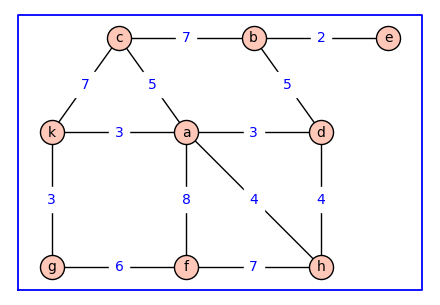

In [36]:
slikaGt

#### Kruskal (minimalno razapinjuće stablo)

In [37]:
rucni_Kruskal(Gt)

'<table>\n<tbody>\n<tr><td>korak </td><td>1     </td><td>2     </td><td>3     </td><td>4     </td><td>5     </td><td>6     </td><td>7     </td><td>8     </td></tr>\n<tr><td>brid  </td><td>(b, e)</td><td>(a, d)</td><td>(k, g)</td><td>(k, a)</td><td>(h, d)</td><td>(a, c)</td><td>(b, d)</td><td>(g, f)</td></tr>\n<tr><td>tezina</td><td>2     </td><td>3     </td><td>3     </td><td>3     </td><td>4     </td><td>5     </td><td>5     </td><td>6     </td></tr>\n</tbody>\n</table>'

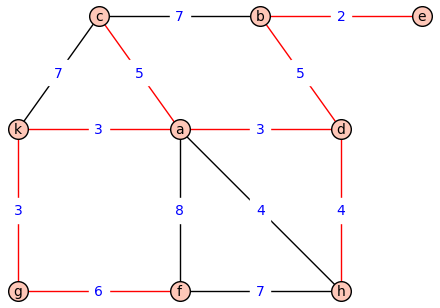

In [38]:
Kruskal_stablo(Gt,raspored_vrhova=Gtpos).show(figsize=[4.5,3.5])

**težina stabla:** 31

#### Kruskal (maksimalno razapinjuće stablo)

In [39]:
rucni_Kruskal(Gt,opcija='max')

'<table>\n<tbody>\n<tr><td>korak </td><td>1     </td><td>2     </td><td>3     </td><td>4     </td><td>5     </td><td>6     </td><td>7     </td><td>8     </td></tr>\n<tr><td>brid  </td><td>(a, f)</td><td>(b, c)</td><td>(k, c)</td><td>(f, h)</td><td>(g, f)</td><td>(a, c)</td><td>(b, d)</td><td>(b, e)</td></tr>\n<tr><td>tezina</td><td>8     </td><td>7     </td><td>7     </td><td>7     </td><td>6     </td><td>5     </td><td>5     </td><td>2     </td></tr>\n</tbody>\n</table>'

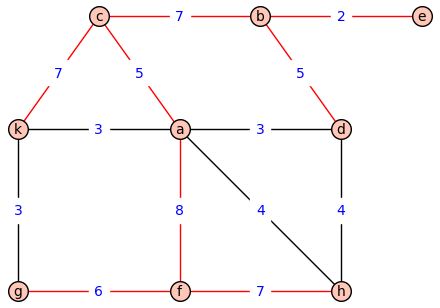

In [40]:
Kruskal_stablo(Gt,'max',raspored_vrhova=Gtpos).show(figsize=[4.5,3.5])

**težina stabla:** 47

#### Prim (minimalno razapinjuće stablo)

In [41]:
rucni_Prim(Gt,c)

'<table>\n<tbody>\n<tr><td>c / korak</td><td>1     </td><td>2     </td><td>3     </td><td>4     </td><td>5     </td><td>6     </td><td>7     </td><td>8     </td></tr>\n<tr><td>brid     </td><td>(a, c)</td><td>(a, d)</td><td>(k, a)</td><td>(k, g)</td><td>(h, d)</td><td>(b, d)</td><td>(b, e)</td><td>(g, f)</td></tr>\n<tr><td>tezina   </td><td>5     </td><td>3     </td><td>3     </td><td>3     </td><td>4     </td><td>5     </td><td>2     </td><td>6     </td></tr>\n</tbody>\n</table>'

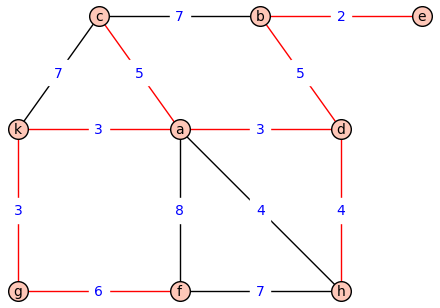

In [42]:
Prim_stablo(Gt,c,raspored_vrhova=Gtpos).show(figsize=[4.5,3.5])

**težina stabla:** 31

#### Prim (maksimalno razapinjuće stablo)

In [43]:
rucni_Prim(Gt,c,opcija='max')

'<table>\n<tbody>\n<tr><td>c / korak</td><td>1     </td><td>2     </td><td>3     </td><td>4     </td><td>5     </td><td>6     </td><td>7     </td><td>8     </td></tr>\n<tr><td>brid     </td><td>(b, c)</td><td>(k, c)</td><td>(a, c)</td><td>(a, f)</td><td>(f, h)</td><td>(g, f)</td><td>(b, d)</td><td>(b, e)</td></tr>\n<tr><td>tezina   </td><td>7     </td><td>7     </td><td>5     </td><td>8     </td><td>7     </td><td>6     </td><td>5     </td><td>2     </td></tr>\n</tbody>\n</table>'

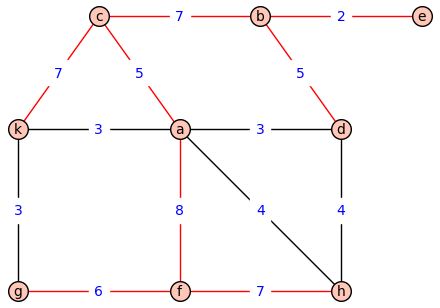

In [44]:
Prim_stablo(Gt,c,'max',raspored_vrhova=Gtpos).show(figsize=[4.5,3.5])

**težina stabla:** 47

In [45]:
#var('a b c d e f g h k')
#G=graphs.RandomGNM(9,13)
#G.relabel([a,b,c,d,e,f,g,h,k])
#G.edges(labels=False)
#G.plot(graph_border=True,save_pos=True)
#G.get_pos()
H = Graph([('c', 'a'), ('d', 'a'), ('f', 'a'), ('h', 'a'), ('k', 'a'), ('c', 'b'), ('d', 'b'), 
           ('k', 'c'), ('h', 'd'), ('g', 'f'), ('h', 'f'), ('k', 'g')])
Hpos = {'a': [1.4, -0.1],
        'b': [1.6, 0.18],
        'c': [1.2, 0.18],
        'd': [1.8, -0.1],
        'f': [1.4, -0.5],
        'g': [1.0, -0.5],
        'h': [1.8, -0.5],
        'k': [1.0, -0.1]}
slikaH = H.plot(pos=Hpos,vertex_size=300,graph_border=True,figsize=[3.3,2.3])
TdH = Graph(DFS(H,'c')[1])
#Td.plot(layout='tree',tree_root='c',save_pos=True)
posTdH = {'k': [1.0, -6],
          'g': [1.0, -5],
          'b': [0.0, -3],
          'f': [1.0, -4],
          'h': [1.0, -3],
          'd': [0.5, -2],
          'a': [0.5, -1],
          'c': [0.5, 0]}
slikaTdH = TdH.plot(pos=posTdH,figsize=[3.3,3.3])

In [46]:
#G.strong_orientation().show(pos=Gpos)
sve = list(H.strong_orientations_iterator())
#lukovi = [('c', 'a'), ('a', 'd'), ('d', 'b'), ('d', 'h'), ('f', 'g'), ('h', 'f'), ('g', 'k')]
#for k in range(len(sve)):
#    moze = True
#    for luk in lukovi:
#        if not(luk in sve[k].edges(labels=False)):
#            moze = False
#            break
#    if moze:
#        print(k) 
jaka_or = sve[45]

### 4. zadatak
Zadan je graf $G$ na donjoj slici.
1. Dopušta li graf $G$ jaku orijentaciju? Obrazložite svoj odgovor.
2. Odredite onu jaku orijentaciju na grafu $G-e$ koja se dobiva preko DFS algoritma koji počinje s vrhom $c$, a susjedne vrhove posjećuje po abecedi prema njihovim imenima.

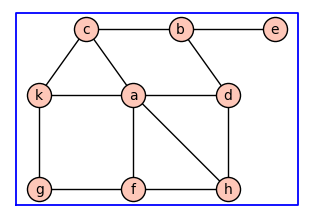

In [47]:
slikaG

Graf $G$ ne dopušta jaku orijentaciju jer ima rezni brid $(b,e)$.

Jaka orijentacija na $G-e$

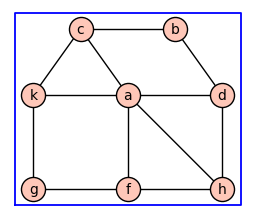

In [48]:
slikaH

Jaka orijentacija na $G-e$

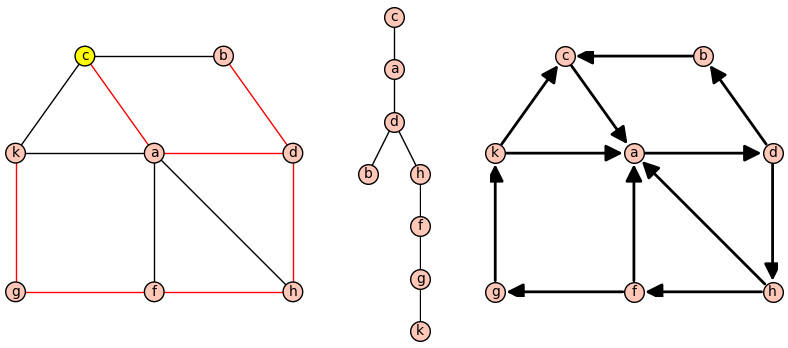

In [49]:
graphics_array([DFS_graf(H,'c',raspored_vrhova=Hpos), slikaTdH, 
                jaka_or.plot(pos=Hpos)],1,3).show(figsize=[8,3.6])